<a href="https://colab.research.google.com/github/Daisuke0209/SVM/blob/master/190330_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVMによる最大マージン分類

##ライブラリのインポート

In [0]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SS
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## Irisデータの読み込み、学習・テストデータに分割

In [0]:
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=0
)

##データの標準化

In [0]:
sc=SS()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

##描画関数の定義

In [0]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers=('s','x','o','^','v')
  colors=('red','blue','lightgreen','gray','cyan')
  cmap=ListedColormap(colors[:len(np.unique(y))])
  
  x1_min, x1_max=X[:,0].min()-1,X[:,0].max()+1
  x2_min, x2_max=X[:,1].min()-1,X[:,1].max()+1
  
  xx1,xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
  
  Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  z=Z.reshape(xx1.shape)
  
  plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
  
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y=X[y==cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
    
  if test_idx:
    X_test, y_test=X[test_idx,:],y[test_idx]
    plt.scatter(X_test[:,0],X_test[:,1],c='gray',
               alpha=1.0, linewidths=1, marker='v',
               s=55, label='test set')

## 学習・テストデータの合体

In [0]:
X_combined_std=np.vstack((X_train_std, X_test_std))
y_combined=np.hstack((y_train, y_test))

## SVMの定義・学習

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


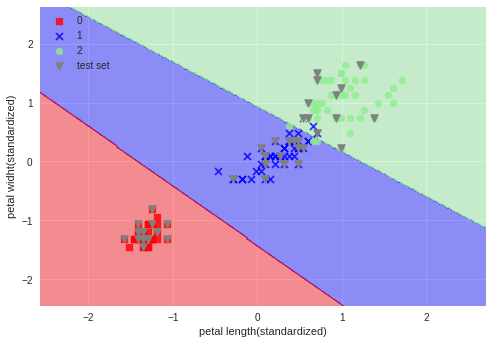

In [15]:
svm=SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length(standardized)')
plt.ylabel('petal widht(standardized)')
plt.legend(loc='upper left')
plt.show()

In [0]:
plt.scatter(X_test_std[:,0],X_test[:,1],c='',
               alpha=1.0, linewidths=1, marker='v',
               s=55, label='test set')
plt.scatter(X_test_std[:,0],X_test[:,1],alpha=1.0)